# Project - Classification of Human Activities

Disciplina de Tópicos de Ciência de Dados

Joana Simões, nº 2019217013

In [32]:
# imports 
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score

## Exercise 1.1

In [101]:
def split_train_test(X, y, percentage_test=0.3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test, random_state=42)
    return x_train, x_test, y_train, y_test

In [7]:
def split_k_fold(X, y, k_folds):
    x_train = []
    x_test = []
    y_train = []
    y_test = []

    k_fold = KFold(n_splits=k_folds, random_state=42, shuffle=True)

    for train_index, test_index in k_fold.split(X):
        x_train.append(X[train_index])
        y_train.append(y[train_index])
        x_test.append(X[test_index])
        y_test.append(y[test_index])

    return x_train, x_test, y_train, y_test

## Exercise 1.2

In [81]:
def calculate_confusion_matrix(y, y_pred, labels=None):
    cm = confusion_matrix(y, y_pred, labels=labels)
    display = ConfusionMatrixDisplay(cm, display_labels=labels)
    display.plot()
    plt.show()
    return cm

In [82]:
def calculate_recall(y, y_pred, metric=None):
    score = recall_score(y, y_pred, average=metric)
    return score

In [83]:
def calculate_precision(y, y_pred, metric=None):
    return precision_score(y, y_pred, average=metric)

In [84]:
def calculate_f1(y, y_pred, metric=None):
    return f1_score(y, y_pred, average=metric)

In [96]:
def measure_performance(y, y_pred, labels=None):
    print(calculate_confusion_matrix(y, y_pred, labels))
    print(calculate_recall(y, y_pred))
    print(calculate_precision(y, y_pred))
    print(calculate_f1(y, y_pred))

In [86]:
y = np.array([1,2,1, 3, 2, 1, 1])
y_pred = np.array([1, 1, 1, 3, 2, 2, 1])

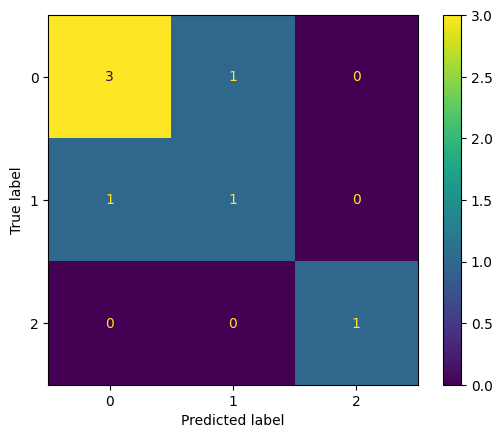

array([[3, 1, 0],
       [1, 1, 0],
       [0, 0, 1]], dtype=int64)

In [87]:
calculate_confusion_matrix(y, y_pred, labels=[1, 2, 3])

In [88]:
calculate_f1(y, y_pred)

array([0.75, 0.5 , 1.  ])

## Exercise 2

In [89]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [90]:
def load_dataset():
    iris_dataset = datasets.load_iris(as_frame=True)
    X = iris_dataset.data
    y = iris_dataset.target
    return X, y

In [102]:
X, y = load_dataset()

In [92]:
X.shape

(150, 4)

In [122]:
x_train, x_test, y_train, y_test = split_train_test(X, y, 0.4)

In [123]:
def model_prediction(x_train, x_test, y_train, y_test, k=1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    

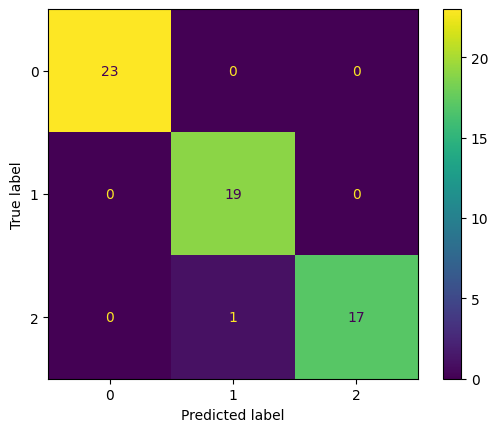

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
[1.         1.         0.94444444]
[1.   0.95 1.  ]
[1.         0.97435897 0.97142857]


In [126]:
model_prediction(x_train, x_test, y_train, y_test)